**SDG 12: Responsible Consumption and Production**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Plastic Waste Around the World.csv")
data = pd.DataFrame(data)
data.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [3]:
data_isNA = data[data.isna().any(axis = 1)]
data_isNA

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk


In [4]:
data = data.query("Country in ['Myanmar','Cambodia','Indonesia','Malaysia','Philippines','Singapore','Thailand','Brunei','Vietnam','Laos']")
data

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High
16,Vietnam,2.54,Food_Packaging,15.3,25.8,Very_High
17,Thailand,2.41,Consumer_Packaging,17.6,34.5,High
18,Malaysia,2.31,Industrial_Consumer,24.3,70.2,High
25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High
44,Singapore,1.27,Industrial_Packaging,59.8,217.9,Medium
81,Cambodia,0.53,Consumer_Packaging,5.4,31.2,High
82,Myanmar,0.51,Consumer_Packaging,2.1,9.3,High
83,Laos,0.49,Consumer_Packaging,1.8,66.2,Medium
150,Brunei,0.12,Consumer_Packaging,8.9,269.4,High


In [5]:
data = data.reset_index()

In [6]:
data_main_src_m = data.groupby("Main_Sources")["Total_Plastic_Waste_MT"].mean()
data_main_src_m = data_main_src_m.sort_values(ascending = False)
data_main_src_m

Main_Sources
Food_Packaging          3.340
Industrial_Consumer     2.310
Industrial_Packaging    1.270
Consumer_Packaging      0.812
Name: Total_Plastic_Waste_MT, dtype: float64

In [7]:
data_main_src_s = data.groupby("Main_Sources")["Total_Plastic_Waste_MT"].sum()
data_main_src_s = data_main_src_s.sort_values(ascending = False)
data_main_src_s

Main_Sources
Food_Packaging          10.02
Consumer_Packaging       4.06
Industrial_Consumer      2.31
Industrial_Packaging     1.27
Name: Total_Plastic_Waste_MT, dtype: float64

In [8]:
data_main_src_std = data.groupby("Main_Sources")["Total_Plastic_Waste_MT"].std()
data_main_src_std = data_main_src_std.sort_values(ascending = False)
data_main_src_std

Main_Sources
Food_Packaging          2.220833
Consumer_Packaging      0.909241
Industrial_Consumer          NaN
Industrial_Packaging         NaN
Name: Total_Plastic_Waste_MT, dtype: float64

In [9]:
data["Recycled_MT"] = (data["Total_Plastic_Waste_MT"] * (data["Recycling_Rate"]/100))

In [10]:
data

,index,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk,Recycled_MT
0,6,Indonesia,5.85,Food_Packaging,11.8,21.3,Very_High,0.69030
1,16,Vietnam,2.54,Food_Packaging,15.3,25.8,Very_High,0.38862
2,17,Thailand,2.41,Consumer_Packaging,17.6,34.5,High,0.42416
3,18,Malaysia,2.31,Industrial_Consumer,24.3,70.2,High,0.56133
4,25,Philippines,1.63,Food_Packaging,9.1,14.8,Very_High,0.14833
5,44,Singapore,1.27,Industrial_Packaging,59.8,217.9,Medium,0.75946
6,81,Cambodia,0.53,Consumer_Packaging,5.4,31.2,High,0.02862
7,82,Myanmar,0.51,Consumer_Packaging,2.1,9.3,High,0.01071
8,83,Laos,0.49,Consumer_Packaging,1.8,66.2,Medium,0.00882
9,150,Brunei,0.12,Consumer_Packaging,8.9,269.4,High,0.01068


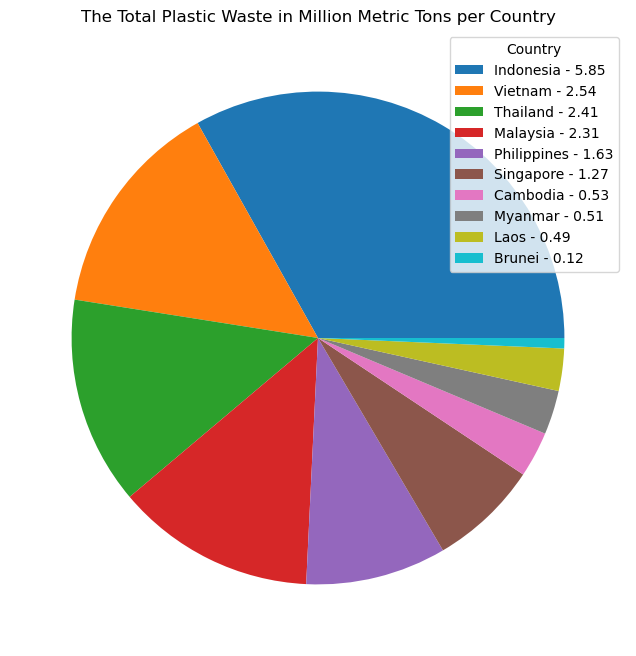

In [11]:
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data["Country"], data["Total_Plastic_Waste_MT"].values)]
plt.figure(figsize = (8, 8))
plt.pie(data["Total_Plastic_Waste_MT"].values)
plt.title("The Total Plastic Waste in Million Metric Tons per Country")
plt.legend(title = "Country", labels = labels, loc = "upper right")
plt.show()

Descriptive Analysis: The chart shows the amount of plastic waste produced by the Southeast Asian countries. Indonesia produces the most plastic waste at 5.85 million metric tons. Vietnam, Thailand, and Malaysia follow with over 2 million metric tons each. Philippines and Singapore, produced over 1 million metric tons. The other countries like Cambodia, Myanmar, Laos, and Brunei produced less, with Brunei having the least at 0.12 million metric tons. Overall, Indonesia has the largest share, and there is a big difference in plastic waste among the countries.

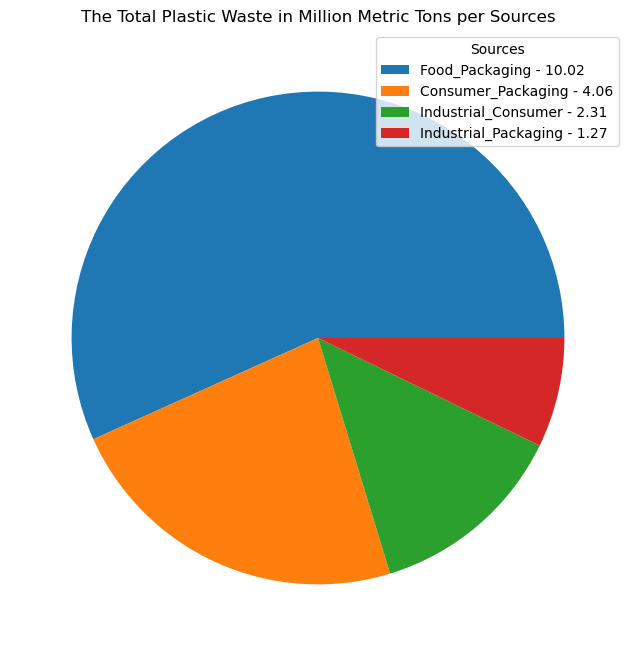

In [13]:
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_main_src_s.index, data_main_src_s.values)]
plt.figure(figsize = (8, 8))
plt.pie(data_main_src_s.values)
plt.title("The Total Plastic Waste in Million Metric Tons per Sources")
plt.legend(title = "Sources", labels = labels, loc = "upper right")
plt.show()

Descriptive Analysis: Food packaging generates the highest plastic waste at 10.02 million metric tons, far exceeding other sources like consumer packaging, and industrial consumer and packaging.

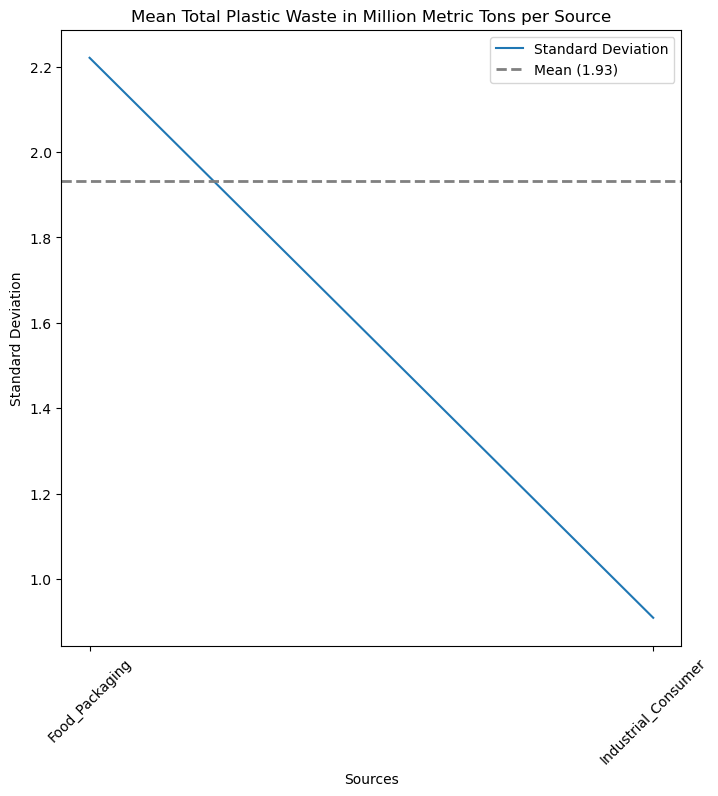

In [15]:
plt.figure(figsize = (8, 8))
plt.plot(data_main_src_m.index, data_main_src_std.values, label = "Standard Deviation")
plt.xlabel("Sources")
plt.xticks(rotation = 45)
plt.ylabel("Standard Deviation")
mean_value = data_main_src_m.mean()
plt.axhline(y = mean_value, color = "gray", linestyle = "--", linewidth = 2, label = f"Mean ({mean_value:.2f})")
plt.title("Mean Total Plastic Waste in Million Metric Tons per Source")
plt.legend()
plt.show()

Descriptive Analysis: The chart shows food packaging source has a higher mean of total plastic waste than the average mean, indicating greater variability in the data. In contrast, the industrial consumer source has a much lower mean, falling below the overall average.

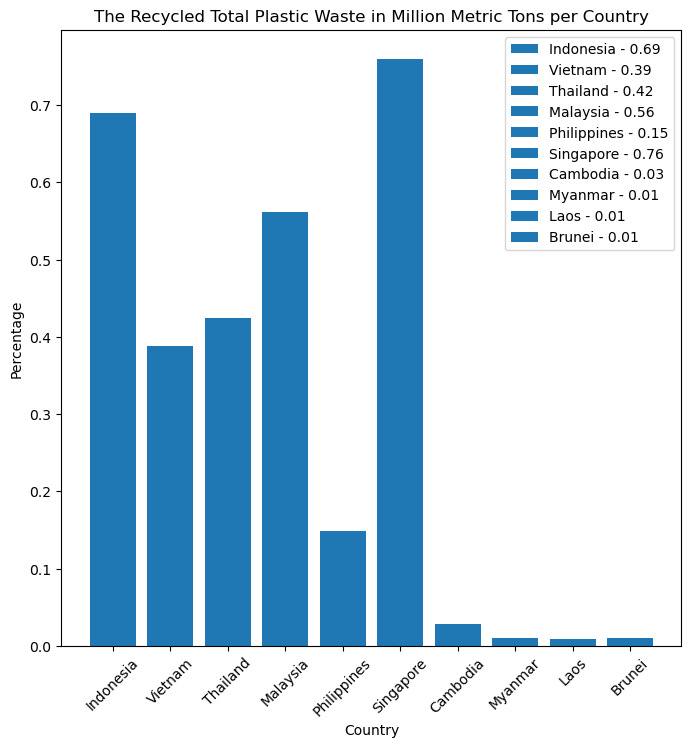

In [17]:
plt.figure(figsize = (8, 8))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data["Country"], data["Recycled_MT"].values)]
bars = plt.bar(data["Country"], data["Recycled_MT"].values)

plt.xlabel("Country")
plt.xticks(rotation = 45)
plt.ylabel("Percentage", rotation = 90)
plt.title("The Recycled Total Plastic Waste in Million Metric Tons per Country")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend()
plt.show()

Descriptive Analysis: The chart shows how much plastic waste is recycled in Southeast Asian countries, measured in million metric tons. Singapore recycles the most, with 0.76 million tons. Indonesia follows with 0.69 million tons, and Malaysia recycles 0.56 million tons. Thailand and Vietnam recycle 0.42 and 0.39 million tons, respectively. The Philippines recycles less, with only 0.15 million tons. Cambodia, Myanmar, Laos, and Brunei recycle the least, each recycling less than 0.05 million tons. Overall, Singapore leads in recycling, while some smaller countries recycle very little.

In [19]:
data_corr = data[["Total_Plastic_Waste_MT","Recycling_Rate","Per_Capita_Waste_KG"]].corr()
data_corr

,Total_Plastic_Waste_MT,Recycling_Rate,Per_Capita_Waste_KG
Total_Plastic_Waste_MT,1.000000,0.105885,-0.374944
Recycling_Rate,0.105885,1.000000,0.496671
Per_Capita_Waste_KG,-0.374944,0.496671,1.000000


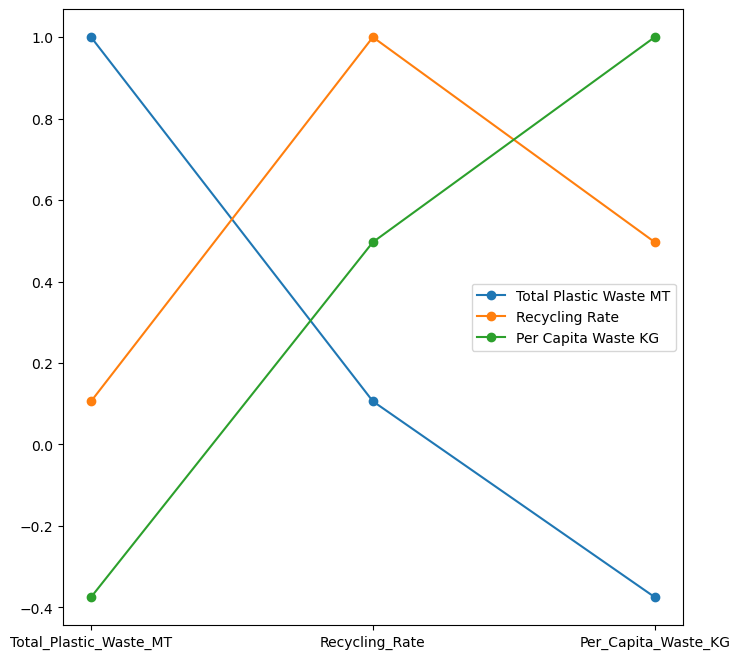

In [20]:
plt.figure(figsize = (8, 8))
plt.plot(data_corr, "o-", label = ["Total Plastic Waste MT","Recycling Rate","Per Capita Waste KG"])
plt.legend()

Descriptive Analysis: The chart shows that Total Plastic Waste has a weak negative correlation with Per Capita Waste (-0.37) and a very weak positive correlation with Recycling Rate (0.11). Recycling Rate has a moderate positive correlation with Per Capita Waste (0.50). This means that as recycling increases, individual waste also tends to increase. However, those that generate more plastic waste overall tend to have lower waste per person, and recycling does not strongly relate to the total amount of waste produced.

Summary: The analysis shows that Indonesia produces the most plastic waste in Southeast Asia, while Brunei produces the least. Food packaging is the largest source of plastic waste, with a much higher amount than other categories. It also has the highest average waste, indicating greater variability. In terms of recycling, Singapore is in the lead, followed by Indonesia and Malaysia, while smaller countries recycle the least. Correlation analysis reveals that countries with higher recycling rates tend to have higher per capita waste, while total plastic waste has little connection to recycling and a weak negative relationship with per person waste. Overall, plastic waste generation and recycling vary widely across the region.